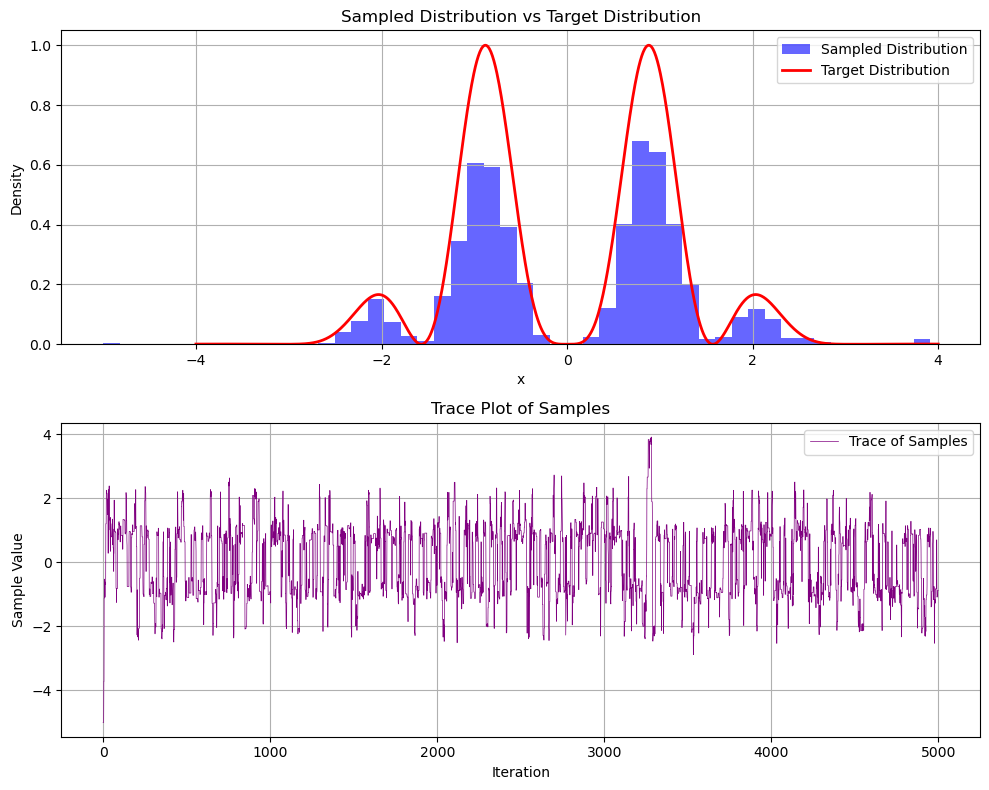

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution (Gaussian in this case)
def target_distribution(x):
    """
    Target distribution proportional to a Gaussian.
    """
    return np.power(np.sin(x)*np.sin(2*x), 2)*np.exp(-0.5 * x**2)
    # return np.exp(-0.5 * x**2)

def normal_pdf(x, mean=0, std=1):
    """
    Compute the PDF of the normal distribution.
    
    Parameters:
        x (array-like): Points where the PDF is evaluated.
        mean (float): Mean of the normal distribution.
        std (float): Standard deviation of the normal distribution.
        
    Returns:
        array-like: Values of the PDF at x.
    """
    return (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((x - mean) / std) ** 2)
    
# Metropolis-Hastings algorithm
def metropolis_hastings(target, initial_sample, proposal_std=1.0, num_samples=5000):
    """
    Metropolis-Hastings algorithm for sampling from a target distribution.
    """
    samples = []
    current_sample = initial_sample
    
    for _ in range(num_samples):
        # Propose a new sample
        proposed_sample = np.random.normal(current_sample, proposal_std)
        
        # Compute acceptance ratio
        acceptance_ratio = min(1, target(proposed_sample) / target(current_sample))
        
        # Accept or reject the proposed sample
        if np.random.rand() < acceptance_ratio:
            current_sample = proposed_sample
        
        samples.append(current_sample)
    
    return np.array(samples)

# Parameters
initial_sample = -5
proposal_std = 1.0
num_samples = 5000

# Run Metropolis-Hastings
samples = metropolis_hastings(
    target=target_distribution,
    initial_sample=initial_sample,
    proposal_std=proposal_std,
    num_samples=num_samples
)

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Histogram of the samples
x = np.linspace(-4, 4, 1000)
y = target_distribution(x) / target_distribution(x).max()  # Normalize for comparison
# y = normal_pdf(x)
ax[0].hist(samples, bins=50, density=True, alpha=0.6, color='blue', label="Sampled Distribution")
ax[0].plot(x, y, color='red', lw=2, label="Target Distribution")
ax[0].set_title("Sampled Distribution vs Target Distribution")
ax[0].set_xlabel("x")
ax[0].set_ylabel("Density")
ax[0].legend()
ax[0].grid()

# Trace plot of the samples
ax[1].plot(samples, color='purple', lw=0.5, label="Trace of Samples")
ax[1].set_title("Trace Plot of Samples")
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Sample Value")
ax[1].legend()
ax[1].grid()

plt.tight_layout()
plt.show()


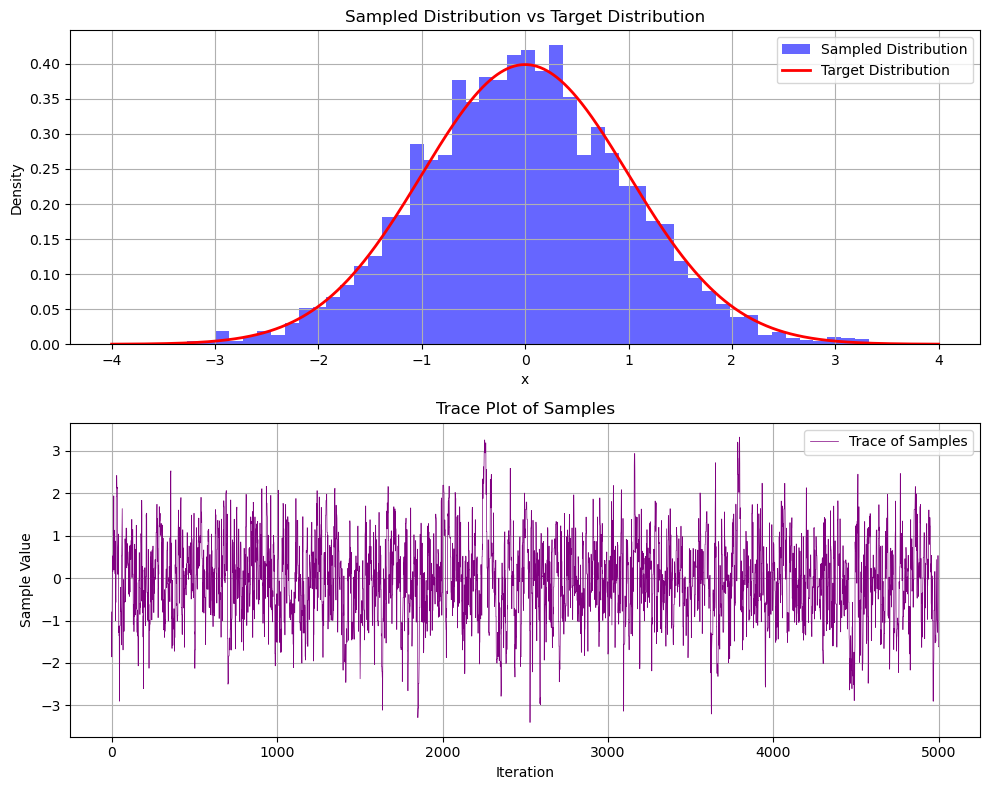

In [3]:
%matplotlib widget